### **1. Importações**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn

import matplotlib.pyplot as plt
import datetime as dt

bibliotecas = {
    "Pandas":pd,
    "Numpy":np,
    "Seaborn":sns,
    "Matplotlib":matplotlib,
    "Sklearn":sklearn}

print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.9.0
Numpy                |     1.26.4
Pandas               |      2.2.2
Seaborn              |     0.13.2
Sklearn              |      1.5.0


In [2]:
produtos = pd.read_csv('../data/annex1.csv')
vendas = pd.read_csv('../data/annex2.csv')
precos = pd.read_csv('../data/annex3.csv')
taxa_perda = pd.read_csv('../data/annex4.csv')

### **2. Explorando as bases de dados**

In [3]:
produtos.head(3)

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables


In [4]:
vendas.head(3)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No


In [5]:
precos.head(3)

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19


In [6]:
taxa_perda.head(3)

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80


### **3. Tratamentos iniciais**

#### **3.1. Linhas e colunas**

In [7]:
print(f"Base de Produtos: Linhas: {produtos.shape[0]:<{7}} | Colunas: {produtos.shape[1]:^{1}}")
print(f"Base de Produtos: Linhas: {vendas.shape[0]:<{7}} | Colunas: {vendas.shape[1]:^{1}}")
print(f"Base de Produtos: Linhas: {precos.shape[0]:<{7}} | Colunas: {precos.shape[1]:^{1}}")
print(f"Base de Produtos: Linhas: {taxa_perda.shape[0]:<{7}} | Colunas: {taxa_perda.shape[1]:^{1}}")

Base de Produtos: Linhas: 251     | Colunas: 4
Base de Produtos: Linhas: 878503  | Colunas: 7
Base de Produtos: Linhas: 55982   | Colunas: 3
Base de Produtos: Linhas: 251     | Colunas: 3


#### **3.2. Linhas duplicadas**

In [8]:
print(produtos.duplicated().sum())
print(vendas.duplicated().sum())
print(precos.duplicated().sum())
print(taxa_perda.duplicated().sum())

0
0
0
0


#### **3.3. Valores nulos por coluna**

In [9]:
print("Base: Produtos")
print(produtos.isnull().sum())
print('')
print("Base: Vendas")
print(vendas.isnull().sum())
print('')
print("Base: Preços")
print(precos.isnull().sum())
print('')
print("Base: Taxa de perdas")
print(taxa_perda.isnull().sum())
print('')

Base: Produtos
Item Code        0
Item Name        0
Category Code    0
Category Name    0
dtype: int64

Base: Vendas
Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
dtype: int64

Base: Preços
Date                        0
Item Code                   0
Wholesale Price (RMB/kg)    0
dtype: int64

Base: Taxa de perdas
Item Code        0
Item Name        0
Loss Rate (%)    0
dtype: int64



#### **3.4. Informações das bases**

##### **3.4.1. Produtos**

In [10]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [11]:
produtos.describe()

,Item Code,Category Code
count,2.510000e+02,2.510000e+02
mean,1.031908e+14,1.011010e+09
std,1.048400e+12,2.915469e+02
min,1.029000e+14,1.011010e+09
25%,1.029000e+14,1.011010e+09
50%,1.029000e+14,1.011011e+09
75%,1.029000e+14,1.011011e+09
max,1.069740e+14,1.011011e+09


##### **3.4.2. Vendas**

In [12]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 non-null  object 
 6   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 46.9+ MB


In [13]:
vendas['Time'].str.slice(0,5)

0         09:15
1         09:17
2         09:17
3         09:19
4         09:20
          ...  
878498    21:35
878499    21:35
878500    21:35
878501    21:35
878502    21:40
Name: Time, Length: 878503, dtype: object

In [14]:
vendas['Date'] = pd.to_datetime(vendas['Date'], format="%Y-%m-%d")
vendas['Time'] = vendas['Time'].str.slice(0,5)
vendas['Time'] = pd.to_datetime(vendas['Time'], format='%H:%M')
vendas['Time'] = vendas['Time'].dt.strftime('%H:%M')
vendas.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20,102900005115908,0.539,8.0,sale,No


##### **3.4.3. Preços**

In [15]:
precos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      55982 non-null  object 
 1   Item Code                 55982 non-null  int64  
 2   Wholesale Price (RMB/kg)  55982 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [16]:
precos['Date'] = pd.to_datetime(vendas['Date'], format="%Y-%m-%d")

In [17]:
precos.describe()

,Date,Item Code,Wholesale Price (RMB/kg)
count,55982,5.598200e+04,55982.000000
mean,2020-07-26 02:00:58.390196736,1.030449e+14,5.962620
min,2020-07-01 00:00:00,1.029000e+14,0.010000
25%,2020-07-14 00:00:00,1.029000e+14,2.810000
50%,2020-07-26 00:00:00,1.029000e+14,4.630000
75%,2020-08-08 00:00:00,1.029000e+14,7.570000
max,2020-08-20 00:00:00,1.069740e+14,141.000000
std,NaN,7.527927e+11,5.067802


##### **3.4.4. Taxa de perdas**

In [18]:
taxa_perda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item Code      251 non-null    int64  
 1   Item Name      251 non-null    object 
 2   Loss Rate (%)  251 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [19]:
taxa_perda.describe()

,Item Code,Loss Rate (%)
count,2.510000e+02,251.000000
mean,1.031908e+14,9.426693
std,1.048400e+12,5.211027
min,1.029000e+14,0.000000
25%,1.029000e+14,8.225000
50%,1.029000e+14,9.430000
75%,1.029000e+14,11.130000
max,1.069740e+14,29.250000


### **4. Análises**

In [20]:
print(produtos.columns)
print(vendas.columns)
print(precos.columns)
print(taxa_perda.columns)

Index(['Item Code', 'Item Name', 'Category Code', 'Category Name'], dtype='object')
Index(['Date', 'Time', 'Item Code', 'Quantity Sold (kilo)',
       'Unit Selling Price (RMB/kg)', 'Sale or Return', 'Discount (Yes/No)'],
      dtype='object')
Index(['Date', 'Item Code', 'Wholesale Price (RMB/kg)'], dtype='object')
Index(['Item Code', 'Item Name', 'Loss Rate (%)'], dtype='object')


In [21]:
base = pd.merge(produtos, taxa_perda[['Item Code','Loss Rate (%)']], how='left', on='Item Code')
base

,Item Code,Item Name,Category Code,Category Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,4.39
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables,10.46
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables,0.18
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables,8.78
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables,18.52
...,...,...,...,...,...
246,106958851400125,Haixian Mushroom (Bag) (4),1011010801,Edible Mushroom,11.13
247,106971533450003,Haixian Mushroom (Bunch),1011010801,Edible Mushroom,0.00
248,106971533455008,Haixian Mushroom (Bag) (3),1011010801,Edible Mushroom,1.30
249,106973223300667,Chinese Caterpillar Fungus Flowers (Box) (2),1011010801,Edible Mushroom,11.13


In [22]:
vendas.loc[vendas['Item Code'] == 102900005115168].shape

(2087, 7)

In [23]:
a = pd.DataFrame(vendas.groupby('Item Code')['Sale or Return'].value_counts()).reset_index()
tabela = pd.crosstab(a['Item Code'], a['Sale or Return'], values=a['count'], aggfunc='sum')
tabela = tabela.fillna(0)
tabela.head(10)

Sale or Return,return,sale
Item Code,,
102900005115168,0.0,2087.0
102900005115199,1.0,1535.0
102900005115250,7.0,11400.0
102900005115625,0.0,306.0
102900005115748,0.0,1305.0
102900005115762,7.0,10292.0
102900005115779,10.0,39877.0
102900005115786,14.0,16172.0
102900005115793,4.0,3966.0


In [24]:
# base = pd.merge(base, tabela['return'], how='left', left_on = base['Item Code'], right_on=tabela['return'].index)
base = pd.merge(base, tabela, how='left', left_on = base['Item Code'], right_on=tabela['return'].index)
base = base.drop('key_0',axis=1)
base[['return','sale']] = base[['return','sale']].astype('Int64')
base


,Item Code,Item Name,Category Code,Category Name,Loss Rate (%),return,sale
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,4.39,0,2087
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables,10.46,1,1535
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables,0.18,0,306
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables,8.78,0,1305
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables,18.52,7,10292
...,...,...,...,...,...,...,...
246,106958851400125,Haixian Mushroom (Bag) (4),1011010801,Edible Mushroom,11.13,1,2149
247,106971533450003,Haixian Mushroom (Bunch),1011010801,Edible Mushroom,0.00,0,1300
248,106971533455008,Haixian Mushroom (Bag) (3),1011010801,Edible Mushroom,1.30,1,1775
249,106973223300667,Chinese Caterpillar Fungus Flowers (Box) (2),1011010801,Edible Mushroom,11.13,0,1


#### **4.1. Visualizando informações a respeito das categorias dos produtos**

In [25]:
base['Category Name'].value_counts()

Category Name
Flower/Leaf Vegetables         100
Edible Mushroom                 72
Capsicum                        45
Aquatic Tuberous Vegetables     19
Solanum                         10
Cabbage                          5
Name: count, dtype: int64

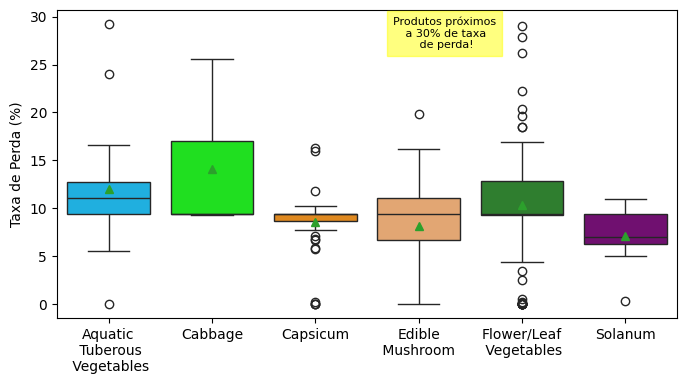

In [26]:
categorias_ordenadas = sorted(base['Category Name'].unique())


fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=base, x='Category Name',y='Loss Rate (%)', hue='Category Name', showmeans=True, order=categorias_ordenadas,
            palette=['forestgreen','lime','deepskyblue','purple','darkorange','sandybrown'] #5, 2, 1, 6, 3, 4
)
a = ['Aquatic\n Tuberous\n Vegetables','Cabbage', 'Capsicum',  'Edible\n Mushroom ', 'Flower/Leaf\n Vegetables','Solanum']
ax.set_xticks(range(0, 6))
ax.set_xticklabels(a, fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Taxa de Perda (%)')
ax.text(3.25, 26.7, 'Produtos próximos\n a 30% de taxa\n de perda!', ha='center', fontsize=8,
        bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='yellow'))

plt.savefig('../images/01_EDA_01_taxa_perda_categorias.png')
plt.show()

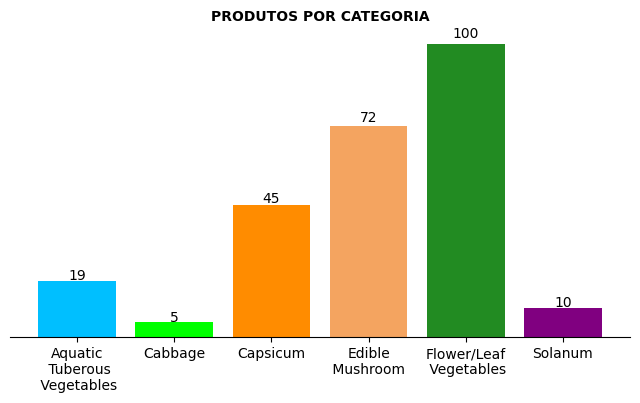

In [27]:
fig, ax = plt.subplots(figsize=(8,4))
ab = base['Category Name'].value_counts().sort_index()
ax.bar(ab.index, ab.values, color=['deepskyblue','lime','darkorange','sandybrown','forestgreen','purple'])#1,2,3,4,5,6
ax.set_xticks(range(0, 6))
a = ['Aquatic\n Tuberous\n Vegetables','Cabbage', 'Capsicum',  'Edible\n Mushroom ', 'Flower/Leaf\n Vegetables','Solanum']
ax.set_xticklabels(a, fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('')
for i in range(6):
    ax.annotate(ab.values[i], (ab.index[i], ab.values[i]+ab.values[i]*0.02), ha='center')
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_title('PRODUTOS POR CATEGORIA', fontsize=10, fontweight='bold')
plt.savefig('../images/01_EDA_02_produtos_por_categoria.png')
plt.show()

In [28]:
def perda_vegetais(x):
    if x >= 25:
        return '25%+'
    elif x >= 20:
        return '20%-25%'
    elif x >= 15:
        return '15%-20%'
    elif x >= 10:
        return '10%-15%'
    elif x >= 5:
        return '05%-10%'
    elif x >= 0:
        return '0%-5%'

# Aplicando a função
base['Agp_Taxa_Perda'] = base['Loss Rate (%)'].apply(perda_vegetais)

#### **4.2. Visualizando intervalos de Taxa de Perda**

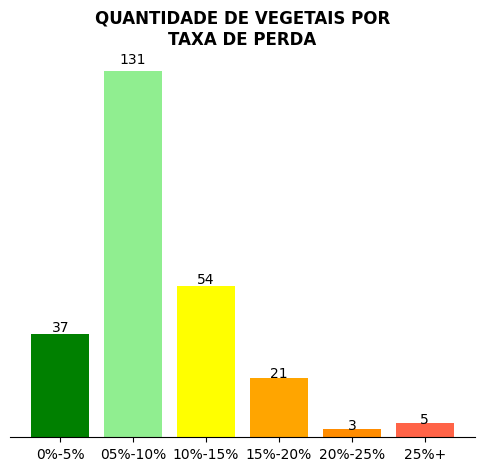

In [29]:
a = base['Agp_Taxa_Perda'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(a.index, a.values, color=['green','lightgreen','yellow','orange','darkorange','tomato'])
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_title('QUANTIDADE DE VEGETAIS POR\nTAXA DE PERDA', fontsize=12, fontweight='bold')
for i in range(0,len(a.index)):
    ax.annotate(a.values[i], (a.index[i], a.values[i]+a.values[i]*0.02),ha='center')
    
plt.savefig('../images/01_EDA_03_intervalos_taxa_perda.png')
plt.show()

In [30]:
vendas.nunique()

Date                           1085
Time                            807
Item Code                       246
Quantity Sold (kilo)           2794
Unit Selling Price (RMB/kg)     264
Sale or Return                    2
Discount (Yes/No)                 2
dtype: int64

In [31]:
base.isnull().sum()

Item Code         0
Item Name         0
Category Code     0
Category Name     0
Loss Rate (%)     0
return            5
sale              5
Agp_Taxa_Perda    0
dtype: int64

Os 5 valores nulos de "sales" e "return" são devido a não presença nos registros de vendas

In [32]:
base = base.fillna(0)
base.head(3)

,Item Code,Item Name,Category Code,Category Name,Loss Rate (%),return,sale,Agp_Taxa_Perda
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,4.39,0,2087,0%-5%
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables,10.46,1,1535,10%-15%
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables,0.18,0,306,0%-5%


#### **4.3. Analisando produtos com as maiores taxas de perda**

In [33]:
base.sort_values(by='Loss Rate (%)', ascending=False).head(10)

,Item Code,Item Name,Category Code,Category Name,Loss Rate (%),return,sale,Agp_Taxa_Perda
107,102900005118824,High Melon (1),1011010402,Aquatic Tuberous Vegetables,29.25,1,3558,25%+
73,102900011033081,Chuncai,1011010101,Flower/Leaf Vegetables,29.03,0,40,25%+
32,102900011006689,Dongmenkou Xiaobaicai,1011010101,Flower/Leaf Vegetables,27.84,2,4160,25%+
33,102900011006948,Foreign Garland Chrysanthemum,1011010101,Flower/Leaf Vegetables,26.16,0,1588,25%+
101,102900011000632,Purple Cabbage (1),1011010201,Cabbage,25.53,0,24,25%+
122,102900051000944,Honghu Lotus Root,1011010402,Aquatic Tuberous Vegetables,24.05,0,2067,20%-25%
16,102900005115960,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,22.27,4,15174,20%-25%
29,102900011000175,Kuaicai,1011010101,Flower/Leaf Vegetables,20.38,0,253,20%-25%
209,102900011030608,The Steak Mushrooms (Box),1011010801,Edible Mushroom,19.80,1,35,15%-20%
97,102900051010790,Purple Beicai,1011010101,Flower/Leaf Vegetables,19.58,0,153,15%-20%


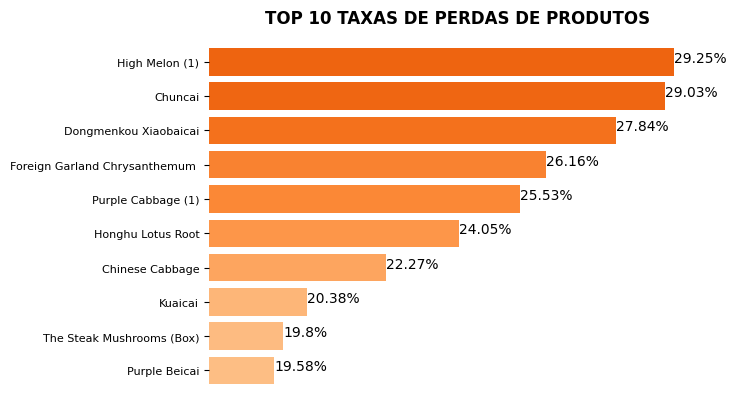

In [34]:
from matplotlib.colors import Normalize

a = base.sort_values(by='Loss Rate (%)', ascending=False).head(10)[['Item Name','Loss Rate (%)']].sort_values(by='Loss Rate (%)',ascending=True)

norm = Normalize(vmin=10, vmax=40)
cmap = plt.get_cmap('Oranges')  
colors = cmap(norm(a['Loss Rate (%)']))

fig, ax = plt.subplots()
ax.barh(a['Item Name'], a['Loss Rate (%)'], color=colors)
ax.set_xlim([18,30])
ax.set_yticks(range(10))
ax.set_yticklabels(labels=a['Item Name'], fontsize=8)
ax.spines[['top','left','right','bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.set_title('TOP 10 TAXAS DE PERDAS DE PRODUTOS', fontweight='bold')
for i in range(10):
    ax.annotate(f'{a["Loss Rate (%)"].values[i]}%', (a['Loss Rate (%)'].values[i],a['Item Name'].values[i]), ha='left')
    
plt.savefig('../images/01_EDA_04_maiores_taxas_perda.png')
plt.show()

#### **Analisando a venda desses produtos**

In [35]:
dez_maiores_taxas_de_perdas = base.sort_values(by='Loss Rate (%)', ascending=False).head(10)
dez_maiores_taxas_de_perdas

,Item Code,Item Name,Category Code,Category Name,Loss Rate (%),return,sale,Agp_Taxa_Perda
107,102900005118824,High Melon (1),1011010402,Aquatic Tuberous Vegetables,29.25,1,3558,25%+
73,102900011033081,Chuncai,1011010101,Flower/Leaf Vegetables,29.03,0,40,25%+
32,102900011006689,Dongmenkou Xiaobaicai,1011010101,Flower/Leaf Vegetables,27.84,2,4160,25%+
33,102900011006948,Foreign Garland Chrysanthemum,1011010101,Flower/Leaf Vegetables,26.16,0,1588,25%+
101,102900011000632,Purple Cabbage (1),1011010201,Cabbage,25.53,0,24,25%+
122,102900051000944,Honghu Lotus Root,1011010402,Aquatic Tuberous Vegetables,24.05,0,2067,20%-25%
16,102900005115960,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,22.27,4,15174,20%-25%
29,102900011000175,Kuaicai,1011010101,Flower/Leaf Vegetables,20.38,0,253,20%-25%
209,102900011030608,The Steak Mushrooms (Box),1011010801,Edible Mushroom,19.80,1,35,15%-20%
97,102900051010790,Purple Beicai,1011010101,Flower/Leaf Vegetables,19.58,0,153,15%-20%


#### A Taxa de perda desses produtos pode ser devido a diversos fatores, como:

- Preços altos
- Não-Época do produto
- Safra ruim
- Mau planejamento do estoque
- Condições climática

In [36]:
print(vendas.Date.min())
print(vendas.Date.max())

2020-07-01 00:00:00
2023-06-30 00:00:00


In [37]:
vendas['Month'] = vendas['Date'].dt.month
vendas['Day'] = vendas['Date'].dt.day
vendas['Price_no_discount'] = round(vendas['Quantity Sold (kilo)'] * vendas['Unit Selling Price (RMB/kg)'],2)
vendas.head(3)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Month,Day,Price_no_discount
0,2020-07-01,09:15,102900005117056,0.396,7.6,sale,No,7,1,3.01
1,2020-07-01,09:17,102900005115960,0.849,3.2,sale,No,7,1,2.72
2,2020-07-01,09:17,102900005117056,0.409,7.6,sale,No,7,1,3.11


In [38]:
dez_codigos = dez_maiores_taxas_de_perdas['Item Code'].values
dez_codigos

array([102900005118824, 102900011033081, 102900011006689, 102900011006948,
       102900011000632, 102900051000944, 102900005115960, 102900011000175,
       102900011030608, 102900051010790], dtype=int64)

Importando função para exibição de gráficos

In [39]:
import sys
sys.path.append('../functions/')
from funcoes import analise_grafica

In [40]:
help(analise_grafica)

Help on function analise_grafica in module funcoes:

analise_grafica(base_vendas, base_produtos, base_taxas, codigo_produto, salvar='nao', titulo_salvamento=None, text_kwargs_ax0=None, text_kwargs_ax1=None)
    Função para exibir gráficos de vendas de um produto
    
    base_vendas ---------- Dataframe de vendas
    base_produtos -------- Dataframe de produtos
    base_taxas ----------- Dataframe de taxas
    codigo_produto ------- Código do produto
    salvar --------------- "sim" ou "yes" para salvar a imagem. Padrão: "não"
    titulo_salvamento ---- Nome para o arquivo .png
    text_kwargs_ax0 ------ Comando para informações adicionais no ax[0].text()
    text_kwargs_ax1 ------ Comando para informações adicionais no ax[1].text()



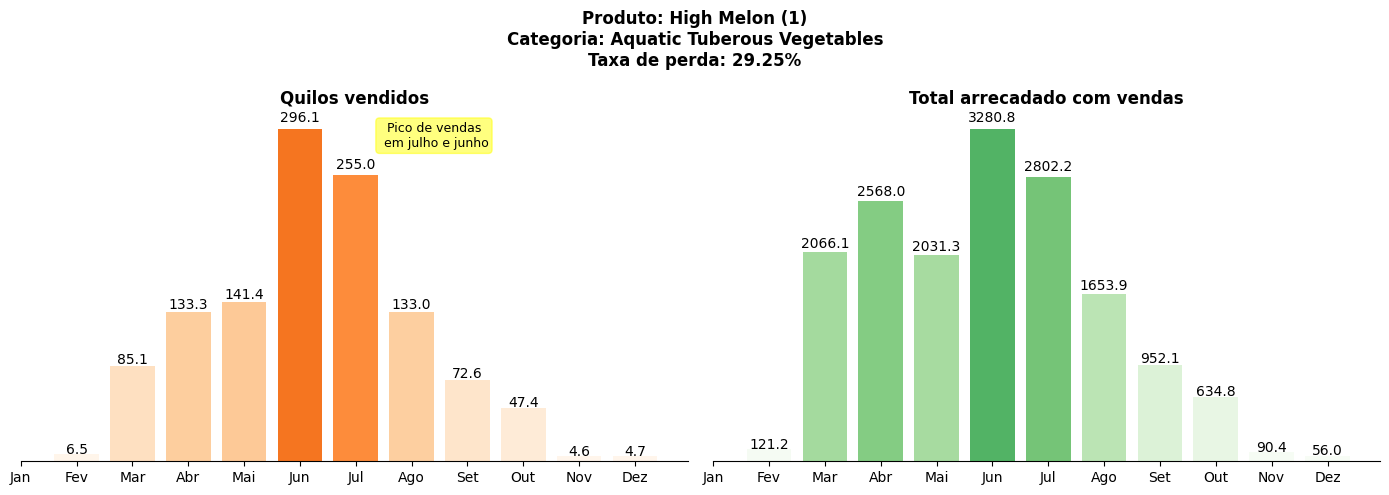

In [41]:
ax1 = analise_grafica(vendas, produtos, taxa_perda, 102900005118824,'sim','01_EDA_05_produto_top1_taxa_perda',
                      text_kwargs_ax0={
                                        'x': 8.4, 
                                        'y': 280, 
                                        's': "Pico de vendas\n em julho e junho", 
                                        'ha': 'center', 
                                        'fontsize': 9, 
                                        'bbox': {
                                            'boxstyle': 'round,pad=0.3',
                                            'facecolor': 'yellow',
                                            'edgecolor': 'yellow',
                                            'alpha': 0.5
                                                }
                                    })

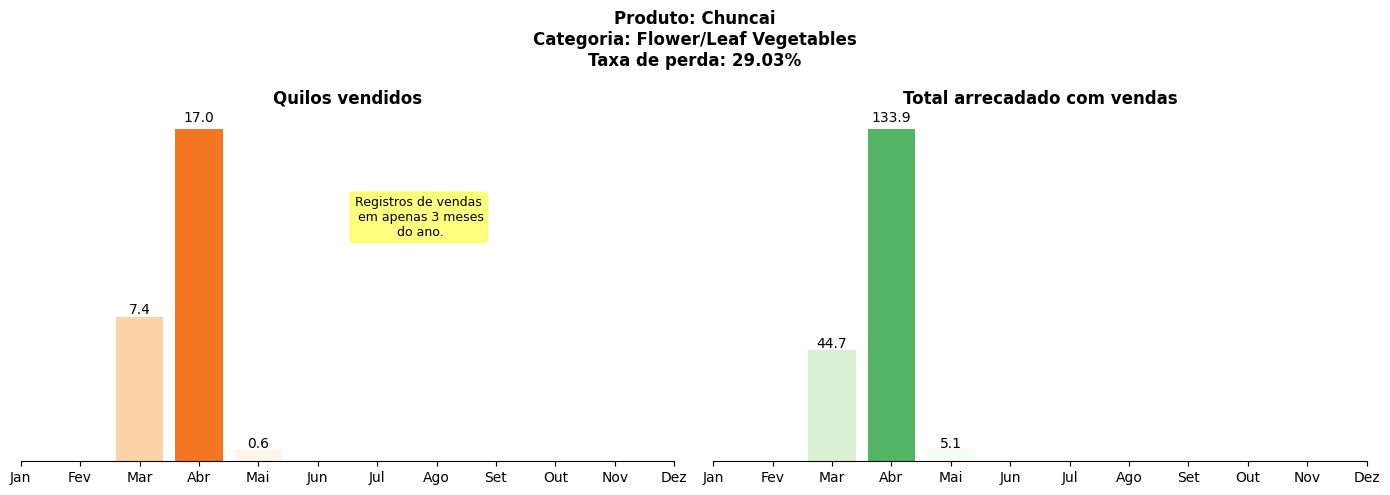

In [42]:
ax1 = analise_grafica(vendas, produtos, taxa_perda, 102900011033081,'sim','01_EDA_06_produto_top2_taxa_perda',
                      text_kwargs_ax0={
                                        'x': 7.7, 
                                        'y': 11.5, 
                                        's': "Registros de vendas\n em apenas 3 meses\n do ano.", 
                                        'ha': 'center', 
                                        'fontsize': 9, 
                                        'bbox': {
                                            'boxstyle': 'round,pad=0.3',
                                            'facecolor': 'yellow',
                                            'edgecolor': 'yellow',
                                            'alpha': 0.5
                                                }
                                    })

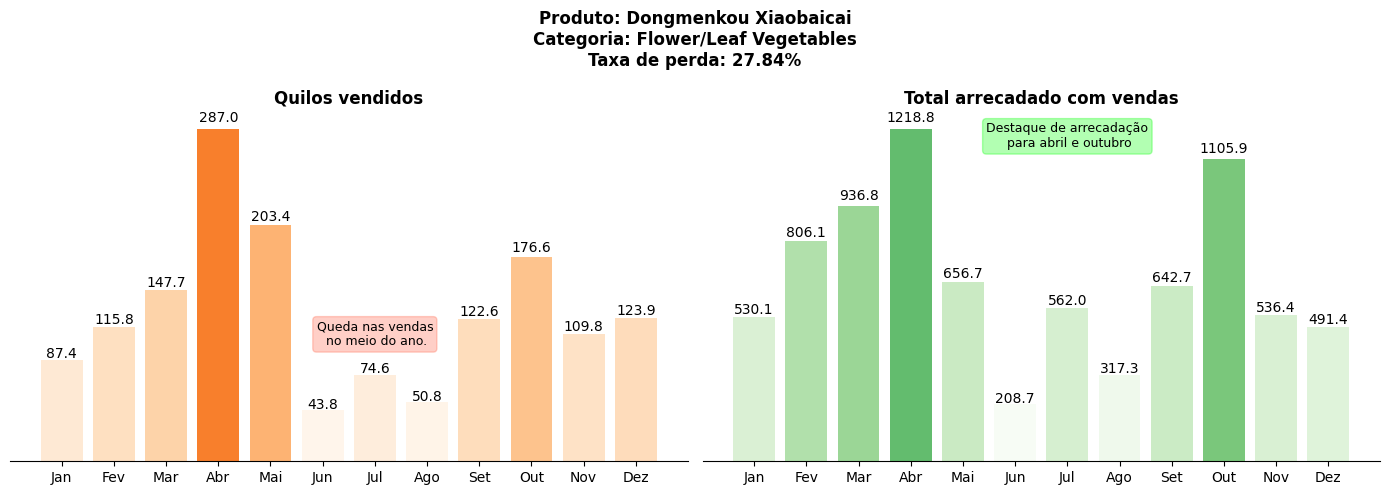

In [43]:
ax1 = analise_grafica(vendas, produtos, taxa_perda, 102900011006689,'sim','01_EDA_07_produto_top3_taxa_perda',
                      text_kwargs_ax0={
                                        'x': 7, 
                                        'y': 100, 
                                        's': "Queda nas vendas\n no meio do ano.", 
                                        'ha': 'center', 
                                        'fontsize': 9, 
                                        'bbox': {
                                            'boxstyle': 'round,pad=0.3',
                                            'facecolor': 'tomato',
                                            'edgecolor': 'tomato',
                                            'alpha': 0.3
                                                }
                                    },

                      text_kwargs_ax1={
                                        'x': 7, 
                                        'y': 1150, 
                                        's': "Destaque de arrecadação\n para abril e outubro", 
                                        'ha': 'center', 
                                        'fontsize': 9, 
                                        'bbox': {
                                            'boxstyle': 'round,pad=0.3',
                                            'facecolor': 'lime',
                                            'edgecolor': 'lime',
                                            'alpha': 0.3
                                                }
                                    })

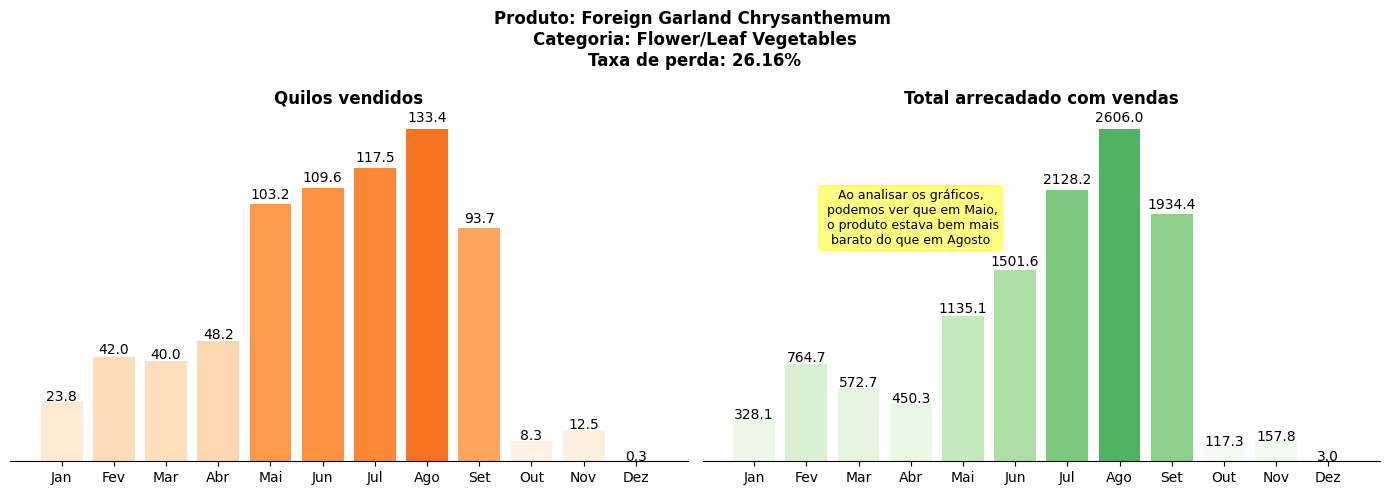

In [44]:
ax1 = analise_grafica(vendas, produtos, taxa_perda, 102900011006948, 'sim','01_EDA_08_produto_top4_taxa_perda',
                      text_kwargs_ax1={
                                        'x': 4, 
                                        'y': 1700, 
                                        's': 'Ao analisar os gráficos,\n podemos ver que em Maio,\n o produto estava bem mais\nbarato do que em Agosto', 
                                        'ha': 'center', 
                                        'fontsize': 9, 
                                        'bbox': {
                                            'boxstyle': 'round,pad=0.3',
                                            'facecolor': 'yellow',
                                            'edgecolor': 'yellow',
                                            'alpha': 0.5
                                                }
                                    })

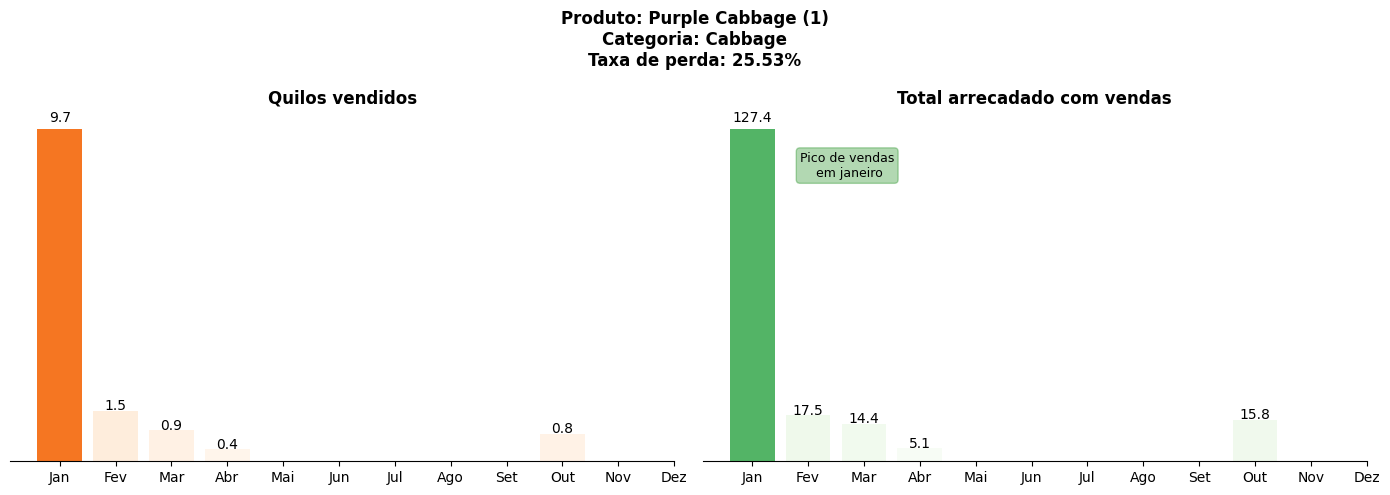

In [45]:
ax1 = analise_grafica(vendas, produtos, taxa_perda, 102900011000632, 'sim','01_EDA_09_produto_top5_taxa_perda',
                      text_kwargs_ax1={
                                        'x': 2.7, 
                                        'y': 109, 
                                        's': 'Pico de vendas\n em janeiro', 
                                        'ha': 'center', 
                                        'fontsize': 9, 
                                        'bbox': {
                                            'boxstyle': 'round,pad=0.3',
                                            'facecolor': 'green',
                                            'edgecolor': 'green',
                                            'alpha': 0.3
                                                }
                                    })